In [1]:
import pandas as pd
import numpy as np
import os, chardet, glob
import matplotlib.pyplot as plt
import seaborn

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.datasets import load_iris

import tensorflow as tf
from tensorflow.keras import Sequential, optimizers, losses, layers

%matplotlib inline







KeyboardInterrupt: 

In [7]:
file_path = r"C:\Users\annan\Onedrive\Desktop\AllTrips.csv"  # For Windows
# Read the CSV file into a DataFrame
df_master = pd.read_csv(file_path)
df_master = df_master.iloc[: , :-2]
print(list(df_master.columns.values))

def plot_dataframe_subplots(df, nrows, ncols, figsize=(30, 24)):
    """Plot a nrows x ncols grid of the df variables"""
    measurements = list(df.columns)
    plt.figure(figsize=figsize)
    for idx, key in enumerate(measurements):
        plt.subplot(nrows, ncols, idx+1)
        plt.plot(np.array(range(df.shape[0]))*0.1, df[key])
        plt.ylabel(key)
        plt.grid(True)
        plt.xlabel(measurements[0])
        plt.show

['Time [s]', 'Velocity [km/h]', 'Elevation [m]', 'Throttle [%]', 'Motor Torque [Nm]', 'Longitudinal Acceleration [m/s^2]', 'Regenerative Braking Signal ', 'Battery Voltage [V]', 'Battery Current [A]', 'Battery Temperature [°C]', 'max. Battery Temperature [°C]', 'SoC [%]', 'displayed SoC [%]', 'min. SoC [%]', 'max. SoC [%)', 'Heating Power CAN [kW]', 'Requested Heating Power [W]', 'AirCon Power [kW]', 'Heater Signal', 'Ambient Temperature [°C]', 'Requested Coolant Temperature [°C]', 'Heat Exchanger Temperature [°C]', 'Cabin Temperature Sensor [°C]', 'Velocity [km/h]]]', 'Heating Power LIN [W]', 'Heater Voltage [V]', 'Heater Current [A]', 'Ambient Temperature Sensor [°C]', 'Coolant Temperature Heatercore [°C]', 'Coolant Temperature Inlet [°C]', 'Coolant Volume Flow +500 [l/h]', 'Temperature Coolant Heater Inlet [°C]', 'Temperature Coolant Heater Outlet [°C]', 'Temperature Heat Exchanger Outlet [°C]', 'Temperature Defrost lateral left [°C]', 'Temperature Defrost lateral right [°C]', 'Temp

In [8]:
df_master.head()


,Time [s],Velocity [km/h],Elevation [m],Throttle [%],Motor Torque [Nm],Longitudinal Acceleration [m/s^2],Regenerative Braking Signal,Battery Voltage [V],Battery Current [A],Battery Temperature [°C],...,Temperature Defrost central right [°C],Temperature Footweel Driver [°C],Temperature Footweel Co-Driver [°C],Temperature Feetvent Co-Driver [°C],Temperature Feetvent Driver [°C],Temperature Head Co-Driver [°C],Temperature Head Driver [°C],Temperature Vent right [°C],Temperature Vent central right [°C],Temperature Vent central left [°C]
0,0.0,0.0,547.0,0.0,0.0,-0.05,0.0,384.1,-5.70,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.1,0.0,547.0,0.0,0.0,-0.07,0.0,384.1,-5.70,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.2,0.0,547.0,0.0,0.0,-0.09,0.0,384.1,-5.70,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.3,0.0,547.0,0.0,0.0,-0.10,0.0,384.1,-5.70,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.4,0.0,547.0,0.0,0.0,-0.07,0.0,384.1,-5.73,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
import pandas as pd
# get columns with NaN values
cols_with_nan = df_master.columns[df_master.isna().any()].tolist()

# print out columns with NaN values and how many NaN values they have
for col in cols_with_nan:
    print(col, "has", df_master[col].isna().sum(), "NaN values")

Velocity [km/h] has 16429 NaN values
SoC [%] has 30793 NaN values
displayed SoC [%] has 30794 NaN values
min. SoC [%] has 30793 NaN values
max. SoC [%) has 30794 NaN values
Requested Coolant Temperature [°C] has 19829 NaN values
Velocity [km/h]]] has 1078364 NaN values
Heating Power LIN [W] has 310587 NaN values
Heater Voltage [V] has 310587 NaN values
Heater Current [A] has 310587 NaN values
Ambient Temperature Sensor [°C] has 472340 NaN values
Coolant Temperature Heatercore [°C] has 310587 NaN values
Coolant Temperature Inlet [°C] has 310587 NaN values
Coolant Volume Flow +500 [l/h] has 496034 NaN values
Temperature Coolant Heater Inlet [°C] has 472340 NaN values
Temperature Coolant Heater Outlet [°C] has 472340 NaN values
Temperature Heat Exchanger Outlet [°C] has 472340 NaN values
Temperature Defrost lateral left [°C] has 472340 NaN values
Temperature Defrost lateral right [°C] has 472340 NaN values
Temperature Defrost central [°C] has 472340 NaN values
Temperature Defrost central 

In [10]:
dftest=df_master.drop(['Heating Power LIN [W]','Heater Voltage [V]','Heater Current [A]','Ambient Temperature Sensor [°C]','Coolant Temperature Heatercore [°C]', 'Coolant Temperature Inlet [°C]',
       'Coolant Volume Flow +500 [l/h]',
       'Temperature Coolant Heater Inlet [°C]',
       'Temperature Coolant Heater Outlet [°C]',
       'Temperature Heat Exchanger Outlet [°C]',
       'Temperature Defrost lateral left [°C]',
       'Temperature Defrost lateral right [°C]',
       'Temperature Defrost central [°C]',
       'Temperature Defrost central left [°C]',
       'Temperature Defrost central right [°C]',
       'Temperature Footweel Driver [°C]',
       'Temperature Footweel Co-Driver [°C]',
       'Temperature Feetvent Co-Driver [°C]',
       'Temperature Feetvent Driver [°C]', 'Temperature Head Co-Driver [°C]',
       'Temperature Head Driver [°C]', 'Temperature Vent right [°C] ',
       'Temperature Vent central right [°C]',
       'Temperature Vent central left [°C]','Velocity [km/h]]]'],axis=1)
dftest

,Time [s],Velocity [km/h],Elevation [m],Throttle [%],Motor Torque [Nm],Longitudinal Acceleration [m/s^2],Regenerative Braking Signal,Battery Voltage [V],Battery Current [A],Battery Temperature [°C],...,min. SoC [%],max. SoC [%),Heating Power CAN [kW],Requested Heating Power [W],AirCon Power [kW],Heater Signal,Ambient Temperature [°C],Requested Coolant Temperature [°C],Heat Exchanger Temperature [°C],Cabin Temperature Sensor [°C]
0,0.0,0.0,547.0,0.0,0.0,-0.05000,0.0,384.1,-5.70000,22.0,...,8.0,90.0,0.0,0.0,1.64,1,22.5,85.0,15.5,38.1700
1,0.1,0.0,547.0,0.0,0.0,-0.07000,0.0,384.1,-5.70000,22.0,...,8.0,90.0,0.0,0.0,1.64,1,22.5,85.0,15.5,38.1700
2,0.2,0.0,547.0,0.0,0.0,-0.09000,0.0,384.1,-5.70000,22.0,...,8.0,90.0,0.0,0.0,1.64,1,22.5,85.0,15.5,38.1700
3,0.3,0.0,547.0,0.0,0.0,-0.10000,0.0,384.1,-5.70000,22.0,...,8.0,90.0,0.0,0.0,1.64,1,22.5,85.0,15.5,38.1700
4,0.4,0.0,547.0,0.0,0.0,-0.07000,0.0,384.1,-5.73000,22.0,...,8.0,90.0,0.0,0.0,1.64,1,22.5,85.0,15.5,38.1700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094788,1396.9,0.0,563.0,0.0,0.0,-0.05200,0.0,388.9,-0.84034,20.0,...,8.0,89.5,0.0,0.0,0.00,1,20.0,85.0,21.0,25.5051
1094789,1397.0,0.0,563.0,0.0,0.0,-0.03539,0.0,388.9,-0.80966,20.0,...,8.0,89.5,0.0,0.0,0.00,1,20.0,85.0,21.0,25.5051
1094790,1397.1,0.0,563.0,0.0,0.0,-0.03200,0.0,388.9,-0.85966,20.0,...,8.0,89.5,0.0,0.0,0.00,1,20.0,85.0,21.0,25.5051
1094791,1397.2,0.0,563.0,0.0,0.0,-0.04862,0.0,388.9,-0.90000,20.0,...,8.0,89.5,0.0,0.0,0.00,1,20.0,85.0,21.0,25.5051


In [11]:
print(list(dftest.columns.values))

['Time [s]', 'Velocity [km/h]', 'Elevation [m]', 'Throttle [%]', 'Motor Torque [Nm]', 'Longitudinal Acceleration [m/s^2]', 'Regenerative Braking Signal ', 'Battery Voltage [V]', 'Battery Current [A]', 'Battery Temperature [°C]', 'max. Battery Temperature [°C]', 'SoC [%]', 'displayed SoC [%]', 'min. SoC [%]', 'max. SoC [%)', 'Heating Power CAN [kW]', 'Requested Heating Power [W]', 'AirCon Power [kW]', 'Heater Signal', 'Ambient Temperature [°C]', 'Requested Coolant Temperature [°C]', 'Heat Exchanger Temperature [°C]', 'Cabin Temperature Sensor [°C]']


In [12]:
import pandas as pd
# get columns with NaN values
cols_with_nan = dftest.columns[dftest.isna().any()].tolist()

# print out columns with NaN values and how many NaN values they have
for col in cols_with_nan:
    print(col, "has", dftest[col].isna().sum(), "NaN values")

Velocity [km/h] has 16429 NaN values
SoC [%] has 30793 NaN values
displayed SoC [%] has 30794 NaN values
min. SoC [%] has 30793 NaN values
max. SoC [%) has 30794 NaN values
Requested Coolant Temperature [°C] has 19829 NaN values


In [13]:
dftest=dftest.dropna()

In [14]:
import pandas as pd
# get columns with NaN values
cols_with_nan = dftest.columns[dftest.isna().any()].tolist()

# print out columns with NaN values and how many NaN values they have
for col in cols_with_nan:
    print(col, "has", dftest[col].isna().sum(), "NaN values")

In [15]:
print(list(dftest.columns.values))

['Time [s]', 'Velocity [km/h]', 'Elevation [m]', 'Throttle [%]', 'Motor Torque [Nm]', 'Longitudinal Acceleration [m/s^2]', 'Regenerative Braking Signal ', 'Battery Voltage [V]', 'Battery Current [A]', 'Battery Temperature [°C]', 'max. Battery Temperature [°C]', 'SoC [%]', 'displayed SoC [%]', 'min. SoC [%]', 'max. SoC [%)', 'Heating Power CAN [kW]', 'Requested Heating Power [W]', 'AirCon Power [kW]', 'Heater Signal', 'Ambient Temperature [°C]', 'Requested Coolant Temperature [°C]', 'Heat Exchanger Temperature [°C]', 'Cabin Temperature Sensor [°C]']


In [16]:

def set_negative_plot_color():
    plt.figure(figsize=(30, 6), facecolor='black')
    ax = plt.axes()
    ax.set_facecolor("black")
    ax.spines['bottom'].set_color('white')
    ax.spines['top'].set_color('white')
    ax.spines['right'].set_color('white')
    ax.spines['left'].set_color('white')
    ax.tick_params(colors='white', which='both')
    plt.grid(True)

def regression_metrics(y_test, y_pred):
    # calculate errors
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    eps = 1e-10 # a small value to avoid division by zero
    rmspe = np.sqrt(np.mean(np.square(((y_test - y_pred) / (y_test + eps)))))
    #rmspe = np.sqrt(np.mean(np.square(((y_test - y_pred)/y_test)), axis=0))
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    # report error
    print(f'Mean Squared Error: {mse}')
    print(f'Root Mean Square Error: {rmse}')
    print(f'Root Mean Square Percentage Error: {rmspe}')
    print(f'Mean Absolute Error: {mae}')
    print(f'Mean Absolute Percentage Error: {mape}')


def plot_comparison(y_test, y_pred, xlabel, ylabel, dark_mode=False, figsize=(30, 6)):
    import matplotlib as mpl
    mpl.rcParams['agg.path.chunksize'] = 200
    mpl.rcParams['path.simplify_threshold'] = 0.5
    if dark_mode:
        plt.figure(figsize=figsize, facecolor='black')
        ax = plt.axes()
        ax.set_facecolor("black")
        ax.spines['bottom'].set_color('gray')
        ax.spines['top'].set_color('gray')
        ax.spines['right'].set_color('gray')
        ax.spines['left'].set_color('gray')
        ax.tick_params(colors='white', which='both')
        plt.plot(y_pred, color="yellow")
        plt.plot(y_test, color="white")
        plt.legend(['Predicted', 'Measured'])
        plt.xlabel(xlabel, color='white')
        plt.ylabel(ylabel, color='white')
    else:
        plt.figure(figsize=figsize)
        plt.plot(y_pred)
        plt.plot(y_test)
        plt.legend(['Predicted', 'Measured'])
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
    plt.grid(True)


In [17]:
X=dftest.drop(['SoC [%]'],axis=1)
y= dftest['SoC [%]']

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# create a linear regression object
lr = LinearRegression()

# create an RFE object to select the top 17 features
rfe = RFE(lr, n_features_to_select=17)

# fit the RFE object to the data
rfe.fit(X, y)

# print the top features selected by the RFE object
top_features = X.columns[rfe.support_].tolist()
print(top_features)


['Elevation [m]', 'Motor Torque [Nm]', 'Longitudinal Acceleration [m/s^2]', 'Regenerative Braking Signal ', 'Battery Voltage [V]', 'Battery Current [A]', 'Battery Temperature [°C]', 'max. Battery Temperature [°C]', 'displayed SoC [%]', 'max. SoC [%)', 'Heating Power CAN [kW]', 'AirCon Power [kW]', 'Heater Signal', 'Ambient Temperature [°C]', 'Requested Coolant Temperature [°C]', 'Heat Exchanger Temperature [°C]', 'Cabin Temperature Sensor [°C]']


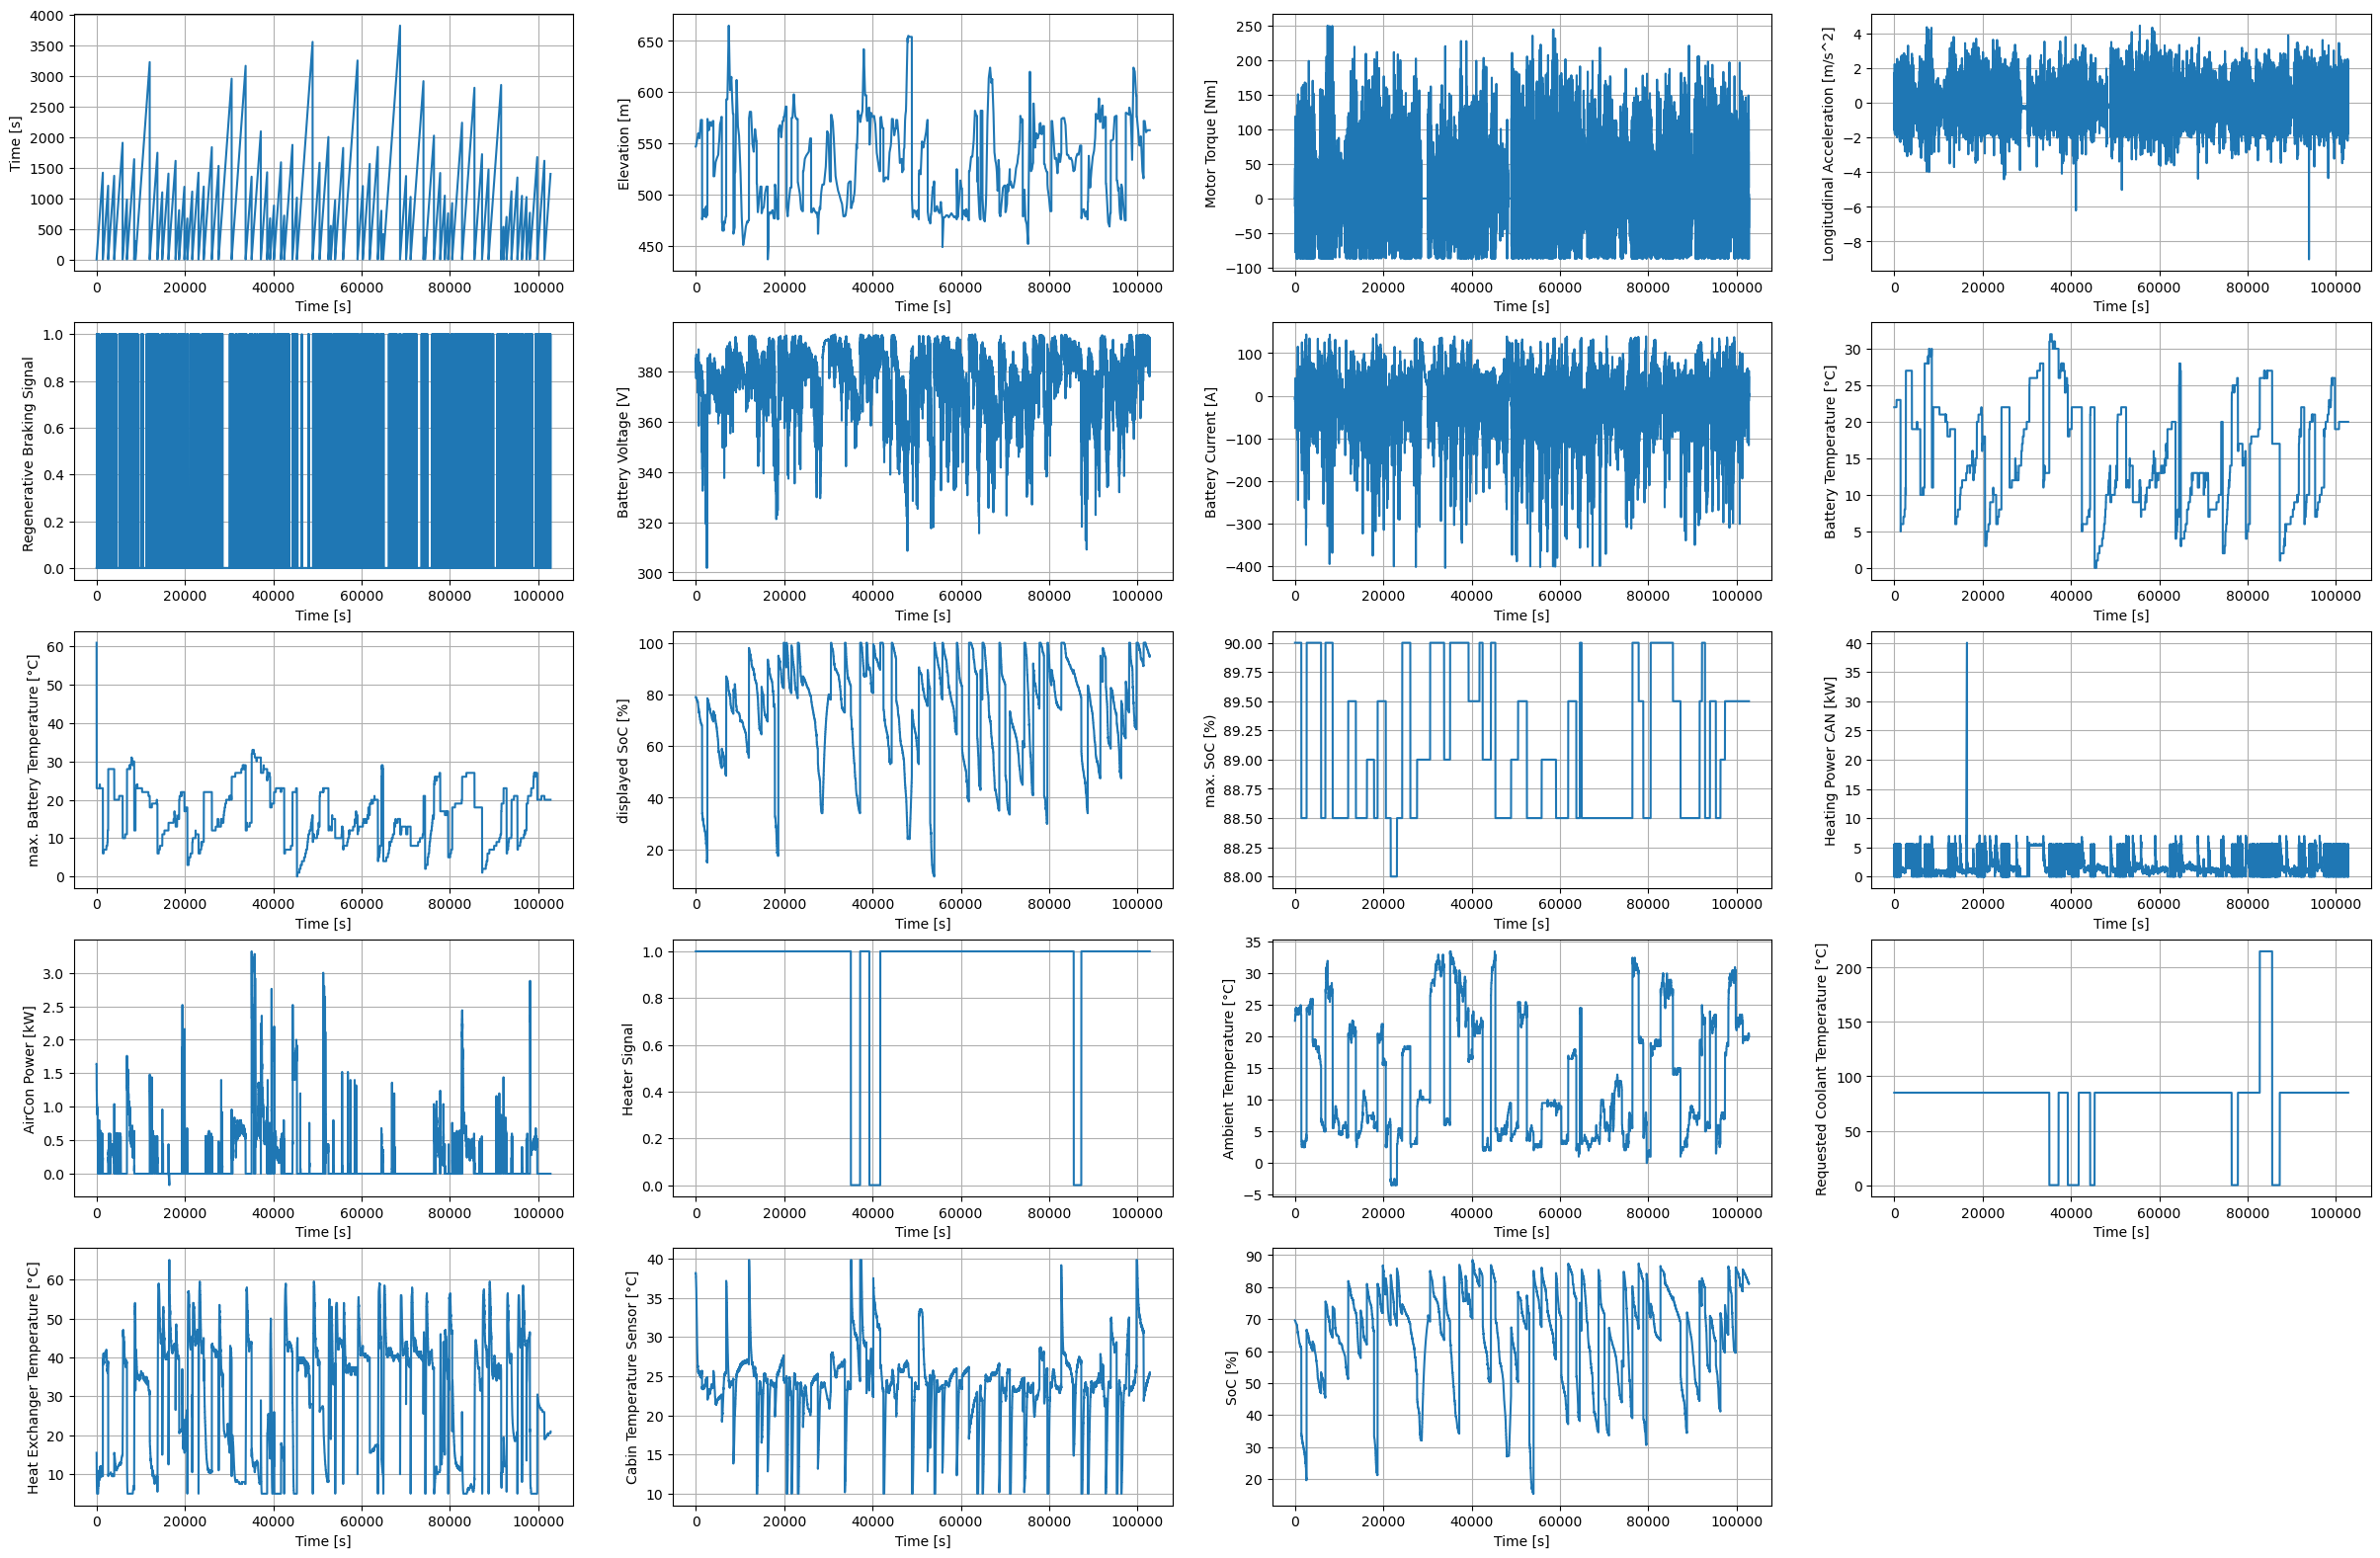

In [19]:

df_x_y = dftest[['Time [s]', 'Elevation [m]', 'Motor Torque [Nm]', 'Longitudinal Acceleration [m/s^2]', 'Regenerative Braking Signal ', 'Battery Voltage [V]', 'Battery Current [A]', 'Battery Temperature [°C]', 'max. Battery Temperature [°C]', 'displayed SoC [%]', 'max. SoC [%)', 'Heating Power CAN [kW]', 'AirCon Power [kW]', 'Heater Signal', 'Ambient Temperature [°C]','Requested Coolant Temperature [°C]', 'Heat Exchanger Temperature [°C]', 'Cabin Temperature Sensor [°C]','SoC [%]']].dropna()

plot_dataframe_subplots(df_x_y, nrows=12, ncols=4, figsize=(30, 48))

In [20]:
print(list(df_x_y.columns.values))

['Time [s]', 'Elevation [m]', 'Motor Torque [Nm]', 'Longitudinal Acceleration [m/s^2]', 'Regenerative Braking Signal ', 'Battery Voltage [V]', 'Battery Current [A]', 'Battery Temperature [°C]', 'max. Battery Temperature [°C]', 'displayed SoC [%]', 'max. SoC [%)', 'Heating Power CAN [kW]', 'AirCon Power [kW]', 'Heater Signal', 'Ambient Temperature [°C]', 'Requested Coolant Temperature [°C]', 'Heat Exchanger Temperature [°C]', 'Cabin Temperature Sensor [°C]', 'SoC [%]']


In [21]:
from sklearn.model_selection import train_test_split
X = df_x_y.drop(['Time [s]','SoC [%]'], axis=1)
y = df_x_y[['SoC [%]']]  # Close the square bracket
# Split the data into train and test sets with a ratio of 95:5
splitter = int(len(X) * 0.95)
X_train, X_test = X.values[:splitter], X.values[splitter:]
y_train, y_test = y.values[:splitter], y.values[splitter:]

# Split the train set into train and validation sets with a ratio of 90:10
splitter1 = int(len(X_train) * 0.9)
X_train, X_val = X_train[:splitter1], X_train[splitter1:]
y_train, y_val = y_train[:splitter1], y_train[splitter1:]

# Check the dataset sizes
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)


(878717, 17) (878717, 1) (97636, 17) (97636, 1) (51388, 17) (51388, 1)


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 17, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_9 (Conv1D)   │ (None, 17, 24)    │         96 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_11 (Conv1D)  │ (None, 17, 24)    │         96 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_13 (Conv1D)  │ (None, 17, 24)    │         96 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 17, 24)    │         48 │ conv1d_9[0][0]    │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 17, 24)    │         48 │ conv1d_11[0][0]   │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 17, 24)    │         48 │ conv1d_13[0][0]   │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_6        │ (None, 17, 24)    │          0 │ layer_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_10 (Conv1D)  │ (None, 17, 24)    │         48 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_7        │ (None, 17, 24)    │          0 │ layer_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_12 (Conv1D)  │ (None, 17, 24)    │         48 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_8        │ (None, 17, 24)    │          0 │ layer_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_14 (Conv1D)  │ (None, 17, 24)    │         48 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_5 (Add)         │ (None, 17, 24)    │          0 │ activation_6[0][… │
│                     │                   │            │ conv1d_10[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_6 (Add)         │ (None, 17, 24)    │          0 │ activation_7[0][… │
│                     │                   │            │ conv1d_12[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_7 (Add)         │ (None, 17, 24)    │          0 │ activation_8[0][… │
│                     │                   │            │ conv1d_14[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_8 (Add)         │ (None, 17, 24)    │          0 │ add_5[0][0],      │
│                     │                   │            │ add_6[0][0],      │
│                     │                   │            │ add_7[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ simple_attention_1  │ (None, 17, 24)    │         24 │ add_8[0][0]       │
│ (SimpleAttention)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 4,513 (17.63 KB)

 Trainable params: 4,513 (17.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
27460/27460 ━━━━━━━━━━━━━━━━━━━━ 154s 5ms/step - loss: 18.4683 - mae: 18.8480 - mape: 29.1226 - val_loss: 1.3710 - val_mae: 1.7366 - val_mape: 3.1134 - learning_rate: 1.0000e-04
Epoch 2/25
27460/27460 ━━━━━━━━━━━━━━━━━━━━ 141s 5ms/step - loss: 0.4405 - mae: 0.6774 - mape: 1.3007 - val_loss: 1.2400 - val_mae: 1.5969 - val_mape: 2.8050 - learning_rate: 1.0000e-04
Epoch 3/25
27460/27460 ━━━━━━━━━━━━━━━━━━━━ 140s 5ms/step - loss: 0.3554 - mae: 0.5672 - mape: 1.0337 - val_loss: 1.1459 - val_mae: 1.4910 - val_mape: 2.6229 - learning_rate: 1.0000e-04
Epoch 4/25
27460/27460 ━━━━━━━━━━━━━━━━━━━━ 143s 5ms/step - loss: 0.3157 - mae: 0.5146 - mape: 0.9166 - val_loss: 1.1826 - val_mae: 1.5376 - val_mape: 2.7062 - learning_rate: 1.0000e-04
Epoch 5/25
27460/27460 ━━━━━━━━━━━━━━━━━━━━ 146s 5ms/step - loss: 0.2905 - mae: 0.4809 - mape: 0.8476 - val_loss: 1.2035 - val_mae: 1.5637 - val_mape: 2.7459 - learning_rate: 1.0000e-04
Epoch 6/25
27460/27460 ━━━━━━━━━━━━━━━━━━━━ 149s 5ms/step - loss: 0

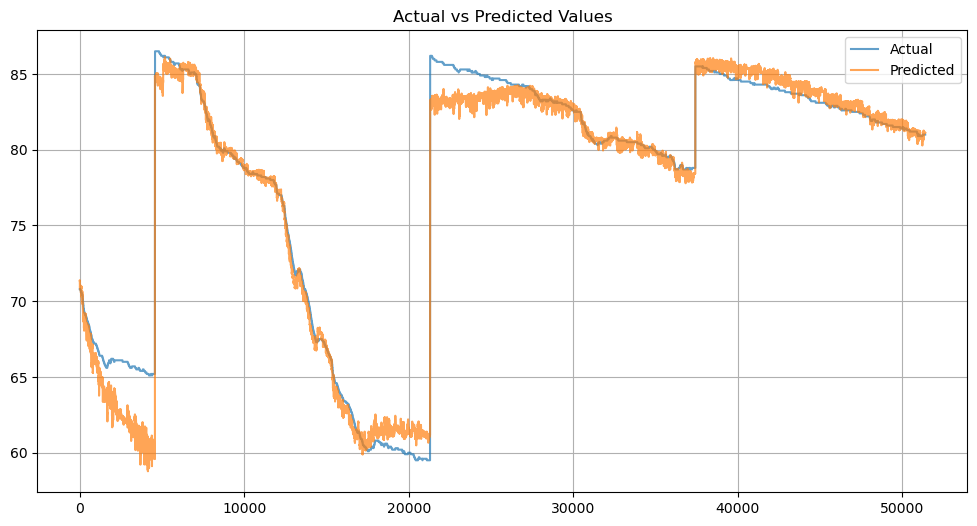

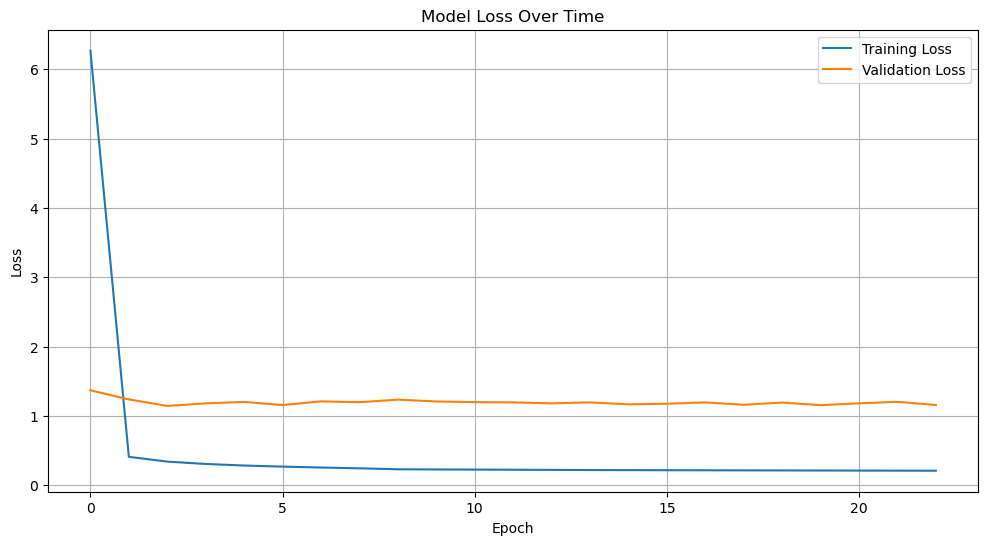

In [ ]:

#Alternative Code which gave an mape of 0.012 with 4200 parameters
#Although the main is at the last of this file....

import tensorflow as tf
from tensorflow.keras.layers import Layer, LayerNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv1D, Input, Activation, Add, Concatenate, Dropout, Dense, GRU
from tensorflow.keras import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

# Custom attention layer for capturing rapid fluctuations
class SimpleAttention(Layer):
    def __init__(self):
        super(SimpleAttention, self).__init__()
        
    def build(self, input_shape):
        self.W = self.add_weight(name='attention_weight',
                                shape=(input_shape[-1], 1),
                                initializer='random_normal',
                                trainable=True)
        
    def call(self, inputs):
        attention_weights = tf.nn.softmax(tf.matmul(inputs, self.W), axis=1)
        return tf.multiply(inputs, attention_weights)

# Enhanced TCN block with skip connections
def enhanced_tcn_block(input_layer, nb_filters, kernel_size, dilation_rate):
    # Shortcut connection
    shortcut = input_layer
    
    # Main path with two conv layers
    conv1 = Conv1D(filters=nb_filters, 
                   kernel_size=kernel_size, 
                   padding='causal', 
                   dilation_rate=dilation_rate,
                   kernel_regularizer=l2(0.0005))(input_layer)
    conv1 = LayerNormalization()(conv1)
    conv1 = Activation('relu')(conv1)
    
    # Add shortcut
    if shortcut.shape[-1] != nb_filters:
        shortcut = Conv1D(nb_filters, 1, padding='same')(shortcut)
    
    output = Add()([conv1, shortcut])
    return output

# Model definition
def create_model(input_shape, l2_strength=0.0005):
    input_layer = Input(shape=input_shape)
    
    # TCN blocks with reduced filters
    tcn_blocks = []
    nb_filters = 24  # Reduced from 32
    
    for dilation_rate in [1, 2, 4]:
        tcn_block = enhanced_tcn_block(input_layer, 
                                     nb_filters=nb_filters, 
                                     kernel_size=3, 
                                     dilation_rate=dilation_rate)
        tcn_blocks.append(tcn_block)
    
    # Merge TCN blocks with attention
    merged = Add()(tcn_blocks)
    attention = SimpleAttention()(merged)
    
    # GRU with reduced units
    gru_layer = GRU(24,  # Reduced from 32
                    activation='tanh',
                    return_sequences=False,
                    kernel_regularizer=l2(l2_strength),
                    recurrent_regularizer=l2(l2_strength))(attention)
    
    # Efficient dense layers
    dense1 = Dense(12,  # Reduced from 16
                  activation='relu',
                  kernel_regularizer=l2(l2_strength))(gru_layer)
    
    # Output layer
    output_layer = Dense(1, 
                        activation='linear',
                        kernel_regularizer=l2(l2_strength))(dense1)
    
    return Model(inputs=input_layer, outputs=output_layer)

# Create and compile model
model = create_model((X_train_norm.shape[1], 1))
model.summary()
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
             loss='huber',  # Better for handling outliers
             metrics=['mae', 'mape'])

# Enhanced callbacks
callbacks = [
    EarlyStopping(monitor='val_loss',
                  patience=20,
                  restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss',
                      factor=0.2,
                      patience=5,
                      min_lr=0.00001)
]

# Train with smaller batch size
history = model.fit(X_train_norm, y_train,
                   epochs=25,
                   batch_size=32,  # Reduced from 64
                   validation_data=(X_val_norm, y_val),
                   callbacks=callbacks,
                   verbose=1)

# Evaluate and predict
y_pred = model.predict(X_test_norm)
regression_metrics(y_test, y_pred)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', alpha=0.7)
plt.plot(y_pred, label='Predicted', alpha=0.7)
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 17, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_15 (Conv1D)  │ (None, 17, 24)    │         96 │ input_layer_5[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_17 (Conv1D)  │ (None, 17, 24)    │         96 │ input_layer_5[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_19 (Conv1D)  │ (None, 17, 24)    │         96 │ input_layer_5[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 17, 24)    │         48 │ conv1d_15[0][0]   │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 17, 24)    │         48 │ conv1d_17[0][0]   │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 17, 24)    │         48 │ conv1d_19[0][0]   │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_9        │ (None, 17, 24)    │          0 │ layer_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_16 (Conv1D)  │ (None, 17, 24)    │         48 │ input_layer_5[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_10       │ (None, 17, 24)    │          0 │ layer_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_18 (Conv1D)  │ (None, 17, 24)    │         48 │ input_layer_5[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_11       │ (None, 17, 24)    │          0 │ layer_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_20 (Conv1D)  │ (None, 17, 24)    │         48 │ input_layer_5[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_9 (Add)         │ (None, 17, 24)    │          0 │ activation_9[0][… │
│                     │                   │            │ conv1d_16[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_10 (Add)        │ (None, 17, 24)    │          0 │ activation_10[0]… │
│                     │                   │            │ conv1d_18[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_11 (Add)        │ (None, 17, 24)    │          0 │ activation_11[0]… │
│                     │                   │            │ conv1d_20[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_12 (Add)        │ (None, 17, 24)    │          0 │ add_9[0][0],      │
│                     │                   │            │ add_10[0][0],     │
│                     │                   │            │ add_11[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ simple_attention_2  │ (None, 17, 24)    │         24 │ add_12[0][0]      │
│ (SimpleAttention)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 4,513 (17.63 KB)

 Trainable params: 4,513 (17.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
27460/27460 ━━━━━━━━━━━━━━━━━━━━ 146s 5ms/step - loss: 18.4120 - mae: 18.7942 - mape: 28.8722 - val_loss: 1.1803 - val_mae: 1.5412 - val_mape: 2.8089 - learning_rate: 1.0000e-04
Epoch 2/50
27460/27460 ━━━━━━━━━━━━━━━━━━━━ 149s 5ms/step - loss: 0.3905 - mae: 0.6374 - mape: 1.1402 - val_loss: 1.1054 - val_mae: 1.4652 - val_mape: 2.5760 - learning_rate: 1.0000e-04
Epoch 3/50
27460/27460 ━━━━━━━━━━━━━━━━━━━━ 154s 6ms/step - loss: 0.3078 - mae: 0.5325 - mape: 0.9130 - val_loss: 1.0881 - val_mae: 1.4489 - val_mape: 2.5482 - learning_rate: 1.0000e-04
Epoch 4/50
27460/27460 ━━━━━━━━━━━━━━━━━━━━ 152s 6ms/step - loss: 0.2699 - mae: 0.4803 - mape: 0.8194 - val_loss: 0.9950 - val_mae: 1.3451 - val_mape: 2.3626 - learning_rate: 1.0000e-04
Epoch 5/50
27460/27460 ━━━━━━━━━━━━━━━━━━━━ 169s 6ms/step - loss: 0.2460 - mae: 0.4457 - mape: 0.7625 - val_loss: 0.9715 - val_mae: 1.3171 - val_mape: 2.3261 - learning_rate: 1.0000e-04
Epoch 6/50
27460/27460 ━━━━━━━━━━━━━━━━━━━━ 177s 6ms/step - loss: 0

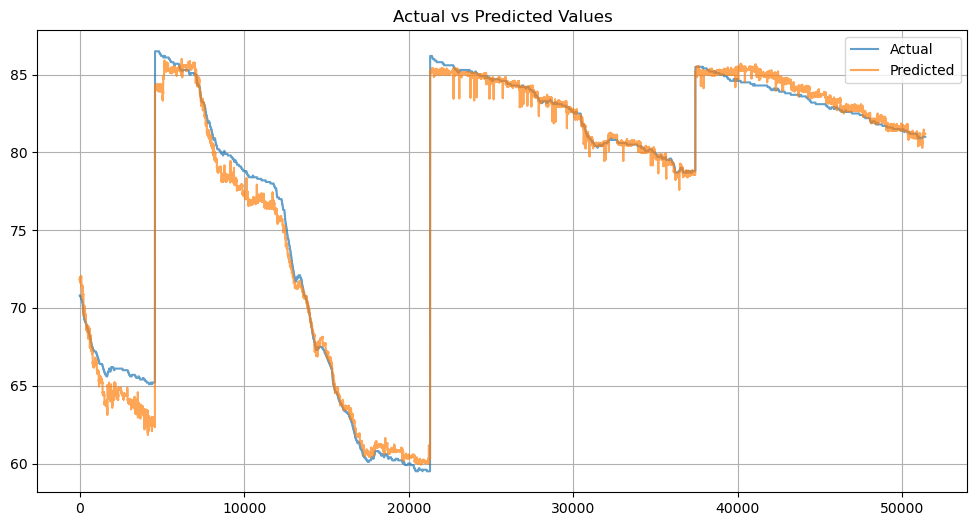

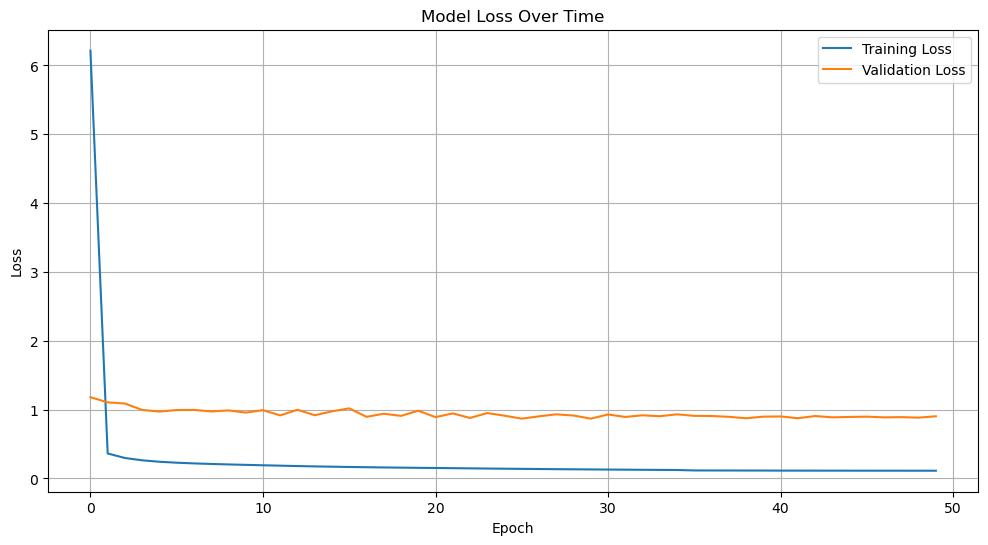

In [ ]:
##Code for Submission

import tensorflow as tf
from tensorflow.keras.layers import Layer, LayerNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv1D, Input, Activation, Add, Concatenate, Dropout, Dense, GRU
from tensorflow.keras import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

# Custom attention layer for capturing rapid fluctuations
class SimpleAttention(Layer):
    def __init__(self):
        super(SimpleAttention, self).__init__()
        
    def build(self, input_shape):
        self.W = self.add_weight(name='attention_weight',
                                shape=(input_shape[-1], 1),
                                initializer='random_normal',
                                trainable=True)
        
    def call(self, inputs):
        attention_weights = tf.nn.softmax(tf.matmul(inputs, self.W), axis=1)
        return tf.multiply(inputs, attention_weights)

# Enhanced TCN block with skip connections
def enhanced_tcn_block(input_layer, nb_filters, kernel_size, dilation_rate):
    # Shortcut connection
    shortcut = input_layer
    
    conv1 = Conv1D(filters=nb_filters, 
                   kernel_size=kernel_size, 
                   padding='causal', 
                   dilation_rate=dilation_rate,
                   kernel_regularizer=l2(0.0005))(input_layer)
    conv1 = LayerNormalization()(conv1)
    conv1 = Activation('relu')(conv1)
    
    if shortcut.shape[-1] != nb_filters:
        shortcut = Conv1D(nb_filters, 1, padding='same')(shortcut)
    
    output = Add()([conv1, shortcut])
    return output

# Model definition
def create_model(input_shape, l2_strength=0.0005):
    input_layer = Input(shape=input_shape)
    
    # TCN blocks with reduced filters
    tcn_blocks = []
    nb_filters = 24 
    
    for dilation_rate in [1, 2, 4]:
        tcn_block = enhanced_tcn_block(input_layer, 
                                     nb_filters=nb_filters, 
                                     kernel_size=3, 
                                     dilation_rate=dilation_rate)
        tcn_blocks.append(tcn_block)
    
    # Merge TCN blocks with attention
    merged = Add()(tcn_blocks)
    attention = SimpleAttention()(merged)
    
    # GRU with reduced units
    gru_layer = GRU(24,  
                    activation='tanh',
                    return_sequences=False,
                    kernel_regularizer=l2(l2_strength),
                    recurrent_regularizer=l2(l2_strength))(attention)
    
    # Efficient dense layers
    dense1 = Dense(12,  
                  activation='relu',
                  kernel_regularizer=l2(l2_strength))(gru_layer)
    
    # Output layer
    output_layer = Dense(1, 
                        activation='linear',
                        kernel_regularizer=l2(l2_strength))(dense1)
    
    return Model(inputs=input_layer, outputs=output_layer)

# Create and compile model
model = create_model((X_train_norm.shape[1], 1))
model.summary()
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
             loss='huber', 
             metrics=['mae', 'mape'])

# Enhanced callbacks
callbacks = [
    EarlyStopping(monitor='val_loss',
                  patience=20,
                  restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss',
                      factor=0.2,
                      patience=5,
                      min_lr=0.00001)
]

# Train with smaller batch size
history = model.fit(X_train_norm, y_train,
                   epochs=50,
                   batch_size=32, 
                   validation_data=(X_val_norm, y_val),
                   callbacks=callbacks,
                   verbose=1)

# Evaluate and predict
y_pred = model.predict(X_test_norm)
regression_metrics(y_test, y_pred)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', alpha=0.7)
plt.plot(y_pred, label='Predicted', alpha=0.7)
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()